In [122]:
import pandas as pd, numpy as np

# Working with Time Series

Since Pandas was created to assist financial modeling, we can expect fairly extensive tools to work with time, date and time-indexed data.

In this section we'll dive deeply into exploring date/time data handeling with pandas

## Dates and Times in Python

While the Pandas date/time representations are quite versetile and useful, there exist some other ways of representing date, time and time durations in Python.

### Native Python dates and times `datetime` and `dateutil`

Pythons basic functionalities with dates and times are stored in the `datetime` module. This and the `dateutil` module helps in performing multiple useful function on time-related objects.

In [123]:
from datetime import datetime
date=datetime(year=2015,month=7,day=4)
date

datetime.datetime(2015, 7, 4, 0, 0)

In [124]:
date.strftime('%A')

'Saturday'

The easy syntax and the flexibility in using the `datetime` and `dateutil` modules is what makes them usefull but their limitations lie in their efficiency when it comes to opperating with large amounts of data.



### Date-time formats in NumPy

The above mentioned weekness was overcome in Numpy's datetime representation. the `datetime64` datatype converts the dates into a 64 bit integer, thus allowing Arrays of dates to be represented very compactly

In [125]:
date=np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [126]:
date+np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

For a given input, numpy can automatically detect the precesion of the time from the input.

In [127]:
np.datetime64('2015-11-14')

numpy.datetime64('2015-11-14')

In [128]:
np.datetime64('2015-11-05 22:59')

numpy.datetime64('2015-11-05T22:59')

In [129]:
np.datetime64('2015-07-04 12:59:59.50')


numpy.datetime64('2015-07-04T12:59:59.500')

Due to the datetime object being 64 bit, it can only encompass $2^{64}$ different unique values depending on the precesion of the variable.

i.e. if we're trying to record time down to picoseconds, then we'll barely have $\pm2.6$ hours of range, but say we're recording out data in years, we'll have $\pm9.5\times10^{18}$ years of range to consider

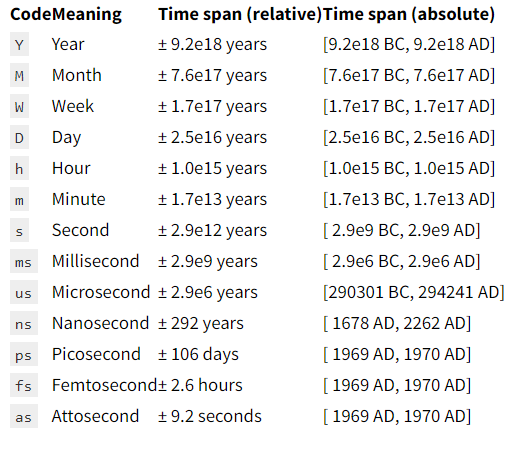

For a lot of real world appications, the `datetime64` datatype is quite effective. But, as we move on, we'll see how, inspite of addressing a lot of the issues, it lacks many convenient methods that are there in the `datetime` and the `dateutil` modules.

### Dates and times in Pandas: the best of both the worlds

Pandas builds upon all the previous features of `numpy.datetime64`, `datetime` and `datetimeutil` with efficient storage and effective vectorized operations which can be used in Series, Dataframe objects.

In [130]:
date=pd.to_datetime("4th of July, 2015")
print(date)
print(date.strftime('%A'))

2015-07-04 00:00:00
Saturday


We can also do Vectorized operations on this object

In [131]:
date+pd.to_timedelta(np.arange(12),'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Indexing using Time-related Datatypes

Time-series tools really become useful when one starts to use them to index data. Consider the following example.

In [132]:
index=pd.DatetimeIndex(['2015-07-04', '2015-08-04','2014-07-04', '2014-08-04'])
data=pd.Series([0,1,2,3],index=index)
data.sort_index(inplace=True)
data

2014-07-04    2
2014-08-04    3
2015-07-04    0
2015-08-04    1
dtype: int64

Now that `data` is a well define series, we can make use of this object along with its usual indexing and slicing properties.

In [133]:
data['2014-07-04':'2015-07-04']

2014-07-04    2
2014-08-04    3
2015-07-04    0
dtype: int64

## Pandas Time Series Data Structures

In this section we will study different types of Time related data types that help us in handeling time related data.

- For representing timestamps, Pandas provides with the `timestamp` type which operates just like the default python `datetime` datatype but the underlying architecture used is borrowed from numpys `datetime64` data type. The associated index structure is `DatetimeIndex`.
- For timeperiod representations, Pandas provides `Period` type. This encodes a fixed-frequency interval based on `numpy.datetime64`. The associated index structure is `PeriodIndex`. 
- For time deltas or durations , Pandas provides the `Timedelta` data type. 
`Timedelta` is more efficient replacement for pythons native `datetime.timedelta` type and is based on the numpy's `numpy.timedelta64` datatype. The associated indexstructure is `TimedeltaIndex`

There might be a confusion between how `Period` and `Timedelta` differ from each other. The time period `pd.Period(20-Apr-2016,'D')` would represent the whole day of 20th April 2016. Similarly, the time period `pd.Period(20-Apr-2016,'H')` would represent the whole first hour of 20th April 2016. `Timedelta`'s on the other hand represent time durations. for example `pd.Timedelta(days=5)` would represent 5 days

In [134]:
pd.Period('20-Apr-2016','H'),pd.Period('20-Apr-2016','D')
pd.Timedelta(days=5)

C:\Users\denis\AppData\Local\Temp\ipykernel_2836\1431888193.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.Period('20-Apr-2016','H'),pd.Period('20-Apr-2016','D')


Timedelta('5 days 00:00:00')

The most fundamental of these datatypes used for representing time-related data is `Timestamp` and the `DatetimeIndex` datatype. Although these datatypes can be invoked using usually (as `pd.Timestamp()` or `pd.DatetimeIndex()`) they are usually implemented using the `pd.to_datetime()` function, which can recognize times in a large variety of formats.

In [135]:
print(pd.Timestamp('25-sept-2021 2:33:49.29'))
print(pd.to_datetime(['02:33:12.15','12:30:13.14'])) #Make sure that within a list-like object, the format of the times are consistant
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015','2015-Jul-6', '07-07-2015', '20150708'])
print(dates)

2021-09-25 02:33:49.290000
DatetimeIndex(['2024-06-29 02:33:12.150000', '2024-06-29 12:30:13.140000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)


C:\Users\denis\AppData\Local\Temp\ipykernel_2836\1426508389.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  print(pd.to_datetime(['02:33:12.15','12:30:13.14'])) #Make sure that within a list-like object, the format of the times are consistant


A datetime index could be converted into a period index with `pd.to_period()` function and a frequency code.

In [136]:
dates.to_period('D')#all timestamps would be converted to their corresponding day periods

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

A TimedeltaIndex can be created by subtracting a date from another

In [137]:
dates-dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: `pd.date_range()`

To facilitate the creation of sequences of time data-types, pandas has provided us with functions like `pd.date_range()`, `pd.timedelta_range()` and `pd.period_range()`. Just like Python's `range()` function and Numpy's `np.arange()` functions are called with a start, stop and a stepsize, the functions mentioned above are also called with similar arguments.

In [138]:
pd.date_range('2015-07-03', '2015-07-10',periods=8)#to divide the duration between start and the end into 8 equitemporal time segments

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq=None)

In [139]:
pd.date_range('2015-07-03', '2015-07-10',freq=pd.Timedelta(hours=3)) # To divide the duration between start and end into equitemporal segments, each being 3 hours long.

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 03:00:00',
               '2015-07-03 06:00:00', '2015-07-03 09:00:00',
               '2015-07-03 12:00:00', '2015-07-03 15:00:00',
               '2015-07-03 18:00:00', '2015-07-03 21:00:00',
               '2015-07-04 00:00:00', '2015-07-04 03:00:00',
               '2015-07-04 06:00:00', '2015-07-04 09:00:00',
               '2015-07-04 12:00:00', '2015-07-04 15:00:00',
               '2015-07-04 18:00:00', '2015-07-04 21:00:00',
               '2015-07-05 00:00:00', '2015-07-05 03:00:00',
               '2015-07-05 06:00:00', '2015-07-05 09:00:00',
               '2015-07-05 12:00:00', '2015-07-05 15:00:00',
               '2015-07-05 18:00:00', '2015-07-05 21:00:00',
               '2015-07-06 00:00:00', '2015-07-06 03:00:00',
               '2015-07-06 06:00:00', '2015-07-06 09:00:00',
               '2015-07-06 12:00:00', '2015-07-06 15:00:00',
               '2015-07-06 18:00:00', '2015-07-06 21:00:00',
               '2015-07-

The function `period_range` and `timedelta_range` can somewhat be used similarly.

## Frequencies and Offsets

Another key concept while studying pandas series tools is that of frequency and data-offset. Just as we saw `D` and `H` being used above to specify frequency in multiple functions, there exist multiple other codes, each of which stand for a certain frequency measure.

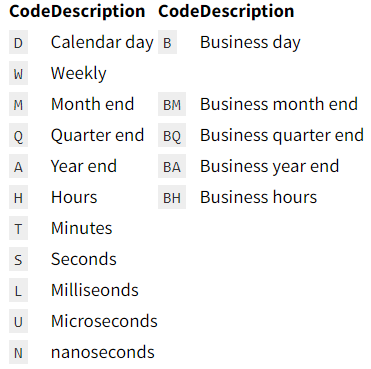

The monthly, quaterly, and annual frequencies are all marked at the end of the specified period. By adding an `s` at the end of any of these, they instead will be marked at the beginning:

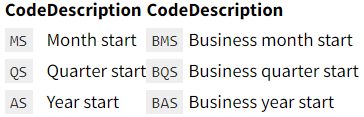

Alongside this, codes can be combined with numbers on top of this to specify other frequencies. eg. a frequency of 2 Hours and 30 minutes can be written as `2H30T`

In [140]:
pd.timedelta_range(0,periods=8,freq='2H30T')

C:\Users\denis\AppData\Local\Temp\ipykernel_2836\4227104812.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0,periods=8,freq='2H30T')
C:\Users\denis\AppData\Local\Temp\ipykernel_2836\4227104812.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.timedelta_range(0,periods=8,freq='2H30T')


TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00'],
               dtype='timedelta64[ns]', freq='150min')

## Resampling, Shifting and Windowing

The convenience of handeling efficiently indexed data on top of timed indeces prove to be a very proficient tool in specific scenario's. We'll see some of these applications further down the lane.

In [141]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [171]:
from pandas_datareader import data

# Fetch data from Stooq
goog = data.DataReader('GOOGL', data_source='stooq',end='2024')
print(goog.head())

              Open    High      Low   Close    Volume
Date                                                 
2023-12-29  139.63  140.36  138.780  139.69  18733017
2023-12-28  140.78  141.14  139.750  140.23  16045712
2023-12-27  141.59  142.08  139.886  140.37  19628618
2023-12-26  141.59  142.68  141.190  141.52  16780333
2023-12-22  140.77  141.99  140.710  141.49  26532199


For now let's play with the closing stock prices

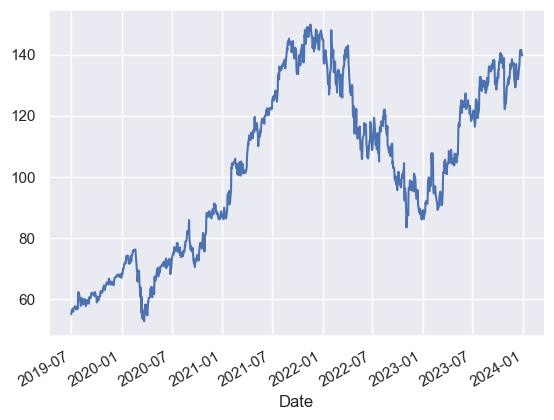

In [172]:
goog=goog['Close']

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_theme()
goog.plot();



### Resampling and converting frequencies

One common task while working with timeseries data is the the resampling of data points, whether it be downsampling or upsampling, downsampling meaning reducing/aggregating the number of data points without disturbing the nature of the dataset, and similarly, upsampling meaning making the dataset richer in datapoints without loss of the nature of the dataset.

There exist two ways by which we can resample the data.
- `resample()` method performs aggregations on chunks of data
- `asfreq()` method selects datapoints from the dataset.

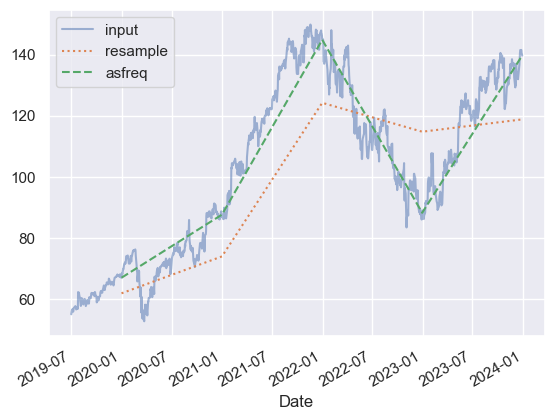

In [175]:
goog.plot(alpha=0.5, style='-')
goog.resample('BYE').mean().plot(style=':')
goog.asfreq('BYE').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],loc='upper left')

For upsampling, `resample()` and `asfreq()` are largely equivalent, though resample has many more options available. In this case, the **default** for both methods is to leave the upsampled points empty, that is fill them with NA values. 

Just like the `fillna()` method(used to fill the Null values of a dataset) accepts multiple arguments, the `asfreq()` method also accepts multiple arguments.

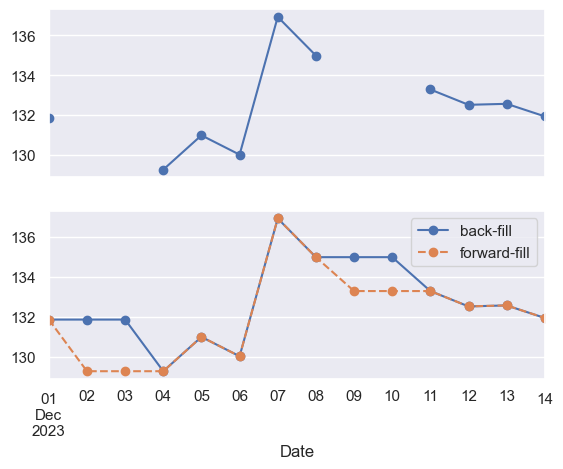

In [189]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[10:20]

data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

The top panel of the generated graph shows the weekends being missed out because of the stock market being closed. The bottom panel shows the weekend values being filled using backward fill and forward fill.

### Time-shifts

AttributeError: 'Series' object has no attribute 'tshift'

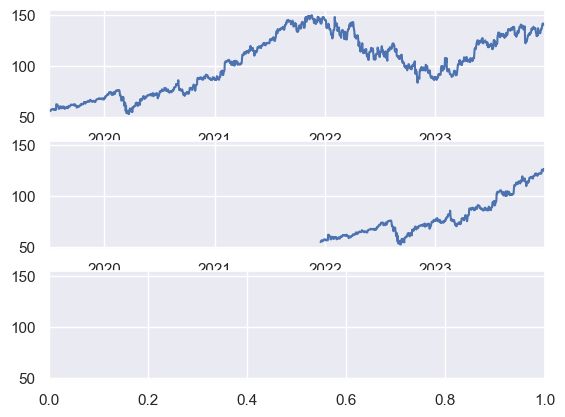

In [190]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');
